# Meteoroids planet fall - data synthesis
Data synthesis as the assignment project for Programming for Data Analysis, GMIT 2019

Lecturer: dr Brian McGinley

>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com

Created: 18-11-2019

This Notebook should be read in conjunction with the corresponding README.md file at the project [repository](https://github.com/andkoc001/data_synthesis.git) at GitHub.

___

## Introduction

### Problem statement and project objectives

Purpose: **To synthesise a dataset that models the phenomenon of meteoroids fall on a planet.**

### The phenomenon

Phenomenon chosen to simulate in this project is **meteorite planet fall** (Meteorite - Wikipedia, 2019). It is a commonplace event in nature, particularly intensive during planetary systems formation. It occurs when certain category of astronomical objects like asteroids traveling along their trajectory paths hit a planet (or similar celestial objects). As an effect of such an event, an impact with the planet surface often occurs. The crash releases energy, causing resulting in creation of an impact crater.

![A new impact crater on Mars](https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA22462-800x600.jpg) Image source: [NASA](https://www.jpl.nasa.gov/spaceimages/details.php?id=PIA22462)

The scenario and data discussed in the Notebook are fictional, invented solely for the purpose of this project. The data generated here is, however, based on the current understanding of the phenomenon and is deemed to reflect its key characteristics accurately. It could as well simulate a real and true events (for instance in an undiscovered solar system in a galaxy far, far away).

Meteoroids planet fall is a highly complex phenomenon than captured in this model. There are a great many factors affecting the phenomenon and relevant to the simulation.  Many of them affect each other, so that the circumstances may appear random and chaotic. Not all the factors were considered in this simulation for simplicity and clarity only. For example: the age and structure of the solar system, the size and density of the planet, the atmosphere thickness, chemical composition of the meteoroids, etc. I believe that the variables chosen for the model reflect the idea of the phenomenon and data synthesised by the simulation reflects its feature adequately.

#### Glossary of key terms

_Complexity_ - ”In science, a complex system is one that is chaotic, and in which the way the system develops feeds back on itself to change the way it is developing.” (Gribbin, 2005)  
_Chaos_ - “In science, chaos occurs when a small change in the starting conditions of process produces a big change in the outcome of the process.” (Gribbin, 2005)  
_Meteor_ - meteoroids passing the atmosphere and burning in the process.  
_Meteorite_ - meteoroid that survived the transit through the atmosphere and hit the ground.  
_Meteoroid_ - object of certain size traveling in outer space (beyond the atmosphere of a planet).  
_Model_ - a simplified and idealised representation (abstraction) of a system.  
_Simulation_ - an approximate imitation of the phenomenon, process or system using its model.  

#### Approach / Method 

The aim of the project is to create a model of the phenomenon, so that it closely imitates the real event.

The first step is identification of the relevant attributes of the phenomenon, based on the subject research. Next, the attributes will be described with variables. Each attribute will require an individual approach. The variables will be modeled by development of algorithms that simulate the real phenomenon characteristics. For this purpose Python capabilities - along with its additional libraries for numerical compuation (NumPy, Scipy, etc) will be employed. Specifically, the NumPy's pseudo-random number generator (PRNG) will be utilised. 

The results generated through the simulation, will be simultaneously aggregated together into a single dataset.

#### Simplifications and assumptions

Note: this is a _simplified model_ in terms of factors considered, relationship between them and terminology describing the phenomenon.

While designing and developing this simulation, I have made a number of assumptions. Some of them include, inter alia:
- A planetary system is subject to celestial mechanics, and is similar enough to our Solar System.
- The planet in question is of a rocky type and has an atmosphere (which properties are negligible).
- The number of meteorites in the local space is very large, that is running out of the meteorites is not considered.
- Units of measurement are arbitrary. 

### Data categories and types

I have chosen to consider and include in my simulation the following several attributes to describe the phenomenon:
1. Time series of observation periods, called in this Notebook as _local_ year; in other words - observation sequence number.
2. Number of the atmosphere entry, that is an event when a meteoroid gets in contact with the atmosphere  (Atmospheric entry - Wikipedia, 2019). The meteoroids can then either a) hit the planet, b) burn out completely (due to fraction) while passing the atmosphere, c) skim the atmosphere without hitting the planet surface and continue the fly thorough the space. The two latter were not considered in my simulation.
3. Number of the meteorites that survived the transit through the atmosphere (did not burned out completely) and hit the planet surface (Impact event - Wikipedia, 2019).
4. Size of the meteorites. This property was idealised in the model and described as mass. Furthermore, only those meteoroids reaching the surface were considered. 
5. Relative speed of the meteorites when it hit the planet's surface. Only those hitting the surface were considered.
6. Size of the impact crater caused by the falling meteorite - it is a measure of the energy released during the collision; in this simulation I assumed it is a function of only two meteorites parameters: _mass_ and _velocity_. NB. only one, the _highest energy_, meteorite in a given period (year) is taken into account for evaluating this variable. _Energy_ is calculated using an invented formula that depends on the meteorite's mass and velocity - not recorded in the dataset.
7. Classification - meteoroids in my simulation can be of one of the three classes: _iron_, _stony_, _stony-iron_  (Geology.com, 2019). NB. only one, the _highest energy_, meteorite in a given year is taken into account for evaluating this variable.

These variables will be discussed in greater detail below.

___
## Data synthesis

### Python environment setup 

#### Importing Python libraries

The following Python libraries were used in synthesising the dataset variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
# below command will allow for the plots being displayed inside the Notebook, rather than in a separate screen.
%matplotlib inline

#### Random number generator seed

I have chosen to define seeds for numPy random methods. That means each time the Notebook and particular cells are run, results will be the same.
In order to generate new random results, reset the kernel and run the Notebook cells except for the one below (which sets the seed values).

In [2]:
determinant = 2019  # seed value pre-set, selected arbitrarily
np.random.seed(determinant) 

### Dataset attributes

The above listed attributes were assigned to the following variables in the dataset.
* `Year` - observation number.
* `Entry` and `Impact` - number of the atmosphere entry and number of hits onto the planet, respectively.
* `Mass` and `Velocity` - properties of the meteoroids reaching the planet's surface.
* `Crater` - size of the impact crater caused by the falling meteorite
* `Class` - classification of the meteoroid

NB. units of expression were purposefully not defined in the dataset.

Herewith I am creating an empty dataset with headings (attributes) only. The dataset is assigned to the variable `data`.

In [3]:
# creation of empty data (just headings)
data = pd.DataFrame(columns = ["Year", "Entry", "Impact", "Mass", "Velocity", "Crater", "Class"]) 

# data.head() # for testing

### 1. Observation number - `Year`

The observations are recorded in sequential interval periods of equal length (time series). These periods can be interpreted as local years (for the planet in question). This will be assigned to variable **`Year`** in the dataset.

Each year is a new observation and a new row in the data table, and is generated by iteration. The total number of observation periods is defined below by an auxiliary variable named `epoch`, therefore the variable defines the size of the dataset.

In [4]:
# defining the length of the epoch, i.e. number of observations
epoch = 1000

Observation periods will be generated sequentially, starting from year=1, until the end of the epoch. One year means an observation period. 

The variables will be then assigned to attribute `Year` and incorporated into the dataset. 

In [5]:
# assigning year values to the data array, other columns with empty values (NaN - not a number)
year = np.arange(1, epoch+1, 1) # returns evenly spaced values, incrementally modifed by the step value; (start, stop [, step])

# adding the values to the dataset
data["Year"] = year

# data.head(2) # shows first two rows of the current state of the data table; disabled for readibility

### 2. Atmosphere entry - `Entry`

Number of  meteoroids' entries into the atmosphere of the planet, represented in the dataset by variable **`Entry`**. 

The intention for this simulation is to generate outputs with relatively low mean and relatively high standard deviation. In reality, the phenomenon is very erratic and chaotic by nature, and can be perceived as a highly unpredictable event. In my model the unpredictability has been reflected by two factors:

1. This variable is generated using random method with **Poisson distribution**. The reason for choosing this distribution is to capture the fact of lesser probability of a larger number of meteoroids entering the planet's atmosphere. The _lambda_ value (Poisson distribution parameter) is also generated randomly, to strengthen the uncertainty. The _lambda_ is assigned to an auxiliary variable `entry_lambda`. It will take a value in a half-open range [2, 4).

2. An additional amplified random noise. It is assumed that in a given year there may be _none_ to _a very large number_ of entries, with a certain mean number. The noise modifier is assigned to an auxiliary variable `entry_noise`. it will take a value in a range [-1500, -500), chosen by experiments.

In order to ensure sensible returns, all negative outputs were converted to positive, using abs() function.

The combination of the two sources of randomness, results in the distribution of the generated values taking the shape similar to one that could be expected in a real scenario.

In [26]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

# defines lambda value for the poisson distribution
entry_lambda = np.random.random() + np.random.randint(2, 4) # expected mean value - it gives a general shape of the distribution
print("Lambda:\t", entry_lambda)

# defines noise used to modify the results
entry_noise = np.random.randint(-1500, -500) # extra random noise - expands the range of possible results and adds randomness and increases the standard deviation
print("Noise:\t", entry_noise)

Lambda:	 3.9034822144192742
Noise:	 -695


In [7]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

# the algorithm with nested random variables - poisson distribution with uniform lambda - and a random noise
# higher probability of occuring fewer meteors entry in a year; only non-negative values
entry = abs(np.random.poisson(abs(entry_lambda + (entry_noise)), len(year)) + entry_noise) # consulted reference: https://stackoverflow.com/a/35730154

# Adding values to the dataset
data["Entry"] = entry

#### Analysis of the atmosphere entries

Minimum:	 0
Mean:		 21.32
Maximum:	 92
Std diviation:	 15.831159148969478


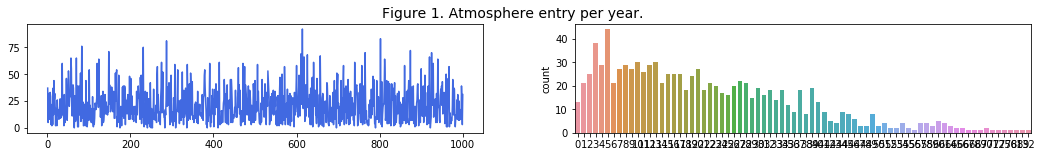

In [74]:
# description of the generated data
#print("atm_entry_lambda:\t", atm_entry_lambda)
#print("atm_entry_noise:\t", atm_entry_noise)
print("Minimum:\t", entry.min())
print("Mean:\t\t", entry.mean())
print("Maximum:\t", entry.max())
print("Std diviation:\t", entry.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 1. Atmosphere entry per year.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.lineplot(x=year, y=entry, color='royalblue', ax=ax[0]) 

# right hand plot - how many the same number of entries occured
sns.countplot(x=entry, ax=ax[1])   

plt.show()

In [9]:
# Number of meteroids entering the atmosphere, list in sequence of observations
print("\nOccurrences (what numbers happend to be generated):\n", np.unique(set(entry)))

# Assigning the variables
unique_elements, counts_elements = np.unique(entry, return_counts=True) # https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php

print("\nFrequency of unique values, sorted (Upper value denotess number of occurrences, lower denotes how many time the number occured in all the observations.):\n", np.asarray((unique_elements, counts_elements)))

# print tabularised results - frequency of yearly entries
hits = pd.DataFrame(np.transpose(np.asarray((unique_elements, counts_elements))))
hits.columns = ['Unique values', 'Counter']
hits


Occurrences (what numbers happend to be generated):
 [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 81, 83, 92}]

Frequency of unique values, sorted (first value denotess number of occurrences, second denotes how many time the number occured in all the observations.):
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59 60 61 64 65 66 67 68 69 70 71 72 75
  76 81 83 92]
 [13 21 25 38 29 44 21 27 29 27 30 26 29 30 21 25 25 25 18 24 27 18 21 20
  17 16 20 22 21 15 19 16 18 14 18 12  9 18  8 19 13  9  5  4  9  8  6  3
   3  8  3  4  2  2  4  2  1  4  4  3  5  4  3  2  2  1  1  1  2  1  1  1
   1  1  1  1]]


,Unique values,Counter
0,0,13
1,1,21
2,2,25
3,3,38
4,4,29
...,...,...
71,75,1
72,76,1
73,81,1
74,83,1


### 3. Surface impact - `Impact`

Number of meteorites hits into the planet surface, that is the meteoroids that entered the atmosphere of the planet and penetrated it without being completely burned out in the transit. The variable is represented in my model by variable **`Impact`** which is a result of **binomial distribution** with certain probability of success. 

The event is simulated by randomly modifying the probability of success, using an auxiliary variable `passing_prob`, which allowable values are in the range [0.05, 0.2) - assumed arbitrarily by experiments. The probability here is generated only once for the entire dataset.

This is simplification, as many potentially influencing factors are neglected here that would have an effect in real situation (for instance the meteoroids' size, density, composition, velocity, angle of entry, atmosphere properties).


This part is based on dr Ian Mcloughlin's [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb) (Mcloughlin, 2019) on coin flip.

In [27]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

# assign probability of meteoroids passing through the atmosfere and hitting the surface
passing_prob = 0.0001*np.random.randint(500, 2001) # range from 0.05 to 0.2

# printing the result
print("Probability of passing through the atmosphere:",round(passing_prob, 4))

Probability of passing through the atmosphere: 0.1596


In [11]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

# filtering the meteoroids - testing how many in each year have passed through the atmosphere

print("Results for a few first observations:\n")

# for each year
for index, row in data.iterrows(): # adapted from https://stackoverflow.com/a/16476974
    #print("\n")
    
    sum = 0 # counter of meteoites successfully passing the atmosphere in a given year
    
    for i in range(data.iat[index, 1]): # data.iat[-1, 1] returns value of a cell
       
        # testing for a single instance (Number of tests, probability of a penetration, number of times to do this);
        passed = np.random.binomial(1, passing_prob, 1) # adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/coin-flip.ipynb
        sum = int(sum + passed)
    
    if index <= 5: # print out for first couple of obsevations
        print("Year:", index+1) #, "\tNumber of meteo:\t", row["Entry"])
        print("Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:\t", sum, "/", row["Entry"], "\n")
    
    if row["Entry"] != 0: # check if there was any meteo hittint the atmosphere in a given year
        ratio_passing = sum/row["Entry"]
        
    else:
        ratio_passing = 0  
    
    # assign number of surface impacts in a year to the main dataset
    data.iat[index, 2] = sum 

Results for a few first observations:

Year: 1
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 12 / 37 

Year: 2
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 0 / 5 

Year: 3
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 4 / 32 

Year: 4
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 2 / 12 

Year: 5
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 4 / 32 

Year: 6
Number of meteoroids passing the atmosphere and hitting the planet / total number entering the atmosphere:	 1 / 8 



### 4. Mass of the meteorites - `Mass`

The mass of the meteorites follows **Pareto distribution**. According to pareto principle, there is many small meteorites and few large. In the dataset this will be assigned to variable **`Mass`**. 

In the model, the mass of **every** meteorite hitting the planet surface in given year is generated, but those not reaching the planet's surface are not considered in the dataset. The variable is stored in a data subset for each year (3rd dimension of the original dataset).

The variable is generated with the help of `np.random.pareto()` function, which requires passing two parameters:
- shape of the distribution - describes how much the number of small meteors would dominate over the large ones; greater the shape value, the more small samples,
- mode of the distribution - tells the magnitude (or scale) of the outcome (the size of the meteors); the larger the mode, the larger the scale of the meteors.

Below, the pareto function parameters are assigned to auxiliary variables.

In [12]:
# adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.pareto.html

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

mass_pareto_a, mass_pareto_m = 1.0, 1000.0  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

In [50]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

print("Results for a few first observations:\n")

# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    
    if i <= 5: print("In year", i, "the number of meteors passing the atmosphere:", number_meteors)
   
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # genertating mass of each meteoroid
        mass_meteo = np.round((0.01*(np.random.pareto(mass_pareto_a, number_meteors) + 1) * mass_pareto_m) + 0.01*np.random.randint(-1000, 10), 1) # random mass for each meteoroid hitting the surface
        
        # recording the masses in the dataset table
        data.at[i-1, "Mass"] = mass_meteo
        
        if i <= 5: print("Their mass are as follows:", data.at[i-1, "Mass"], "\n")
        #print(data)
        
    else:
        pass

Results for a few first observations:

In year 1 the number of meteors passing the atmosphere: 12
Their mass are as follows: [101.5 14.4 24.5 25.5 81.6 12.2 31.5 101.2 82.2 14.7 16.2 11.6] 

In year 2 the number of meteors passing the atmosphere: 0
In year 3 the number of meteors passing the atmosphere: 4
Their mass are as follows: [72.3 11.4 32.5 76.9] 

In year 4 the number of meteors passing the atmosphere: 2
Their mass are as follows: [20.4 12.3] 

In year 5 the number of meteors passing the atmosphere: 4
Their mass are as follows: [10.1 16.2 1.3 26.4] 



Minimum:	 8.0
Mean:		 59.596
Maximum:	 4249.0
Std diviation:	 224.54066176084905


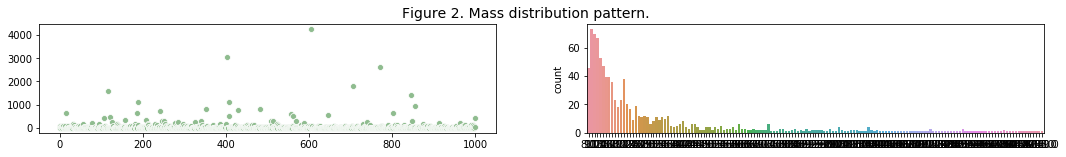

In [73]:
# simulation of the distribution algorithm
mass_distr = np.round((0.01*(np.random.pareto(mass_pareto_a, 1000) + 1) * mass_pareto_m) + 0.01*np.random.randint(-1000, 10), 0)

np.random.seed(determinant) # executing this line ensures the generated numbers are the same

print("Minimum:\t", mass_distr.min())
print("Mean:\t\t", mass_distr.mean())
print("Maximum:\t", mass_distr.max())
print("Std diviation:\t", mass_distr.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 2. Mass distribution pattern.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.scatterplot(x=year, y=mass_distr, color='darkseagreen', ax=ax[0])  

# right hand plot - how many the same number of entries occured
sns.countplot(x=mass_distr, ax=ax[1])   

plt.show()

### 5. Velocity of the meteorites - `Velocity`

Meteoroids **`velocity`** variable distribution is an interesting one. Because there is an energy requirement to propel an object, there will be naturally a larger number of slower moving objects, and fewer faster ones. Furthermore, the possible velocity of astronomical objects in space can vary in range from $0$ to $c$ (speed of light). However, only these velocity values can be taken into account which are within the range limited from the bottom by the _minimum velocity_ (planet escape velocity), and from the top - by the the _maximum velocity_. 
> “On Earth, ignoring the slowing effects of travel through the atmosphere, the lowest impact velocity with an object from space is equal to the gravitational escape velocity of about 11 km/s. The fastest impacts occur at about 72 km/s in the "worst case" scenario in which an object in a retrograde near-parabolic orbit hits Earth. The median impact velocity on Earth is about 20 km/s” https://en.wikipedia.org/wiki/Impact_crater 

In my simulation, I have chosen (arbitrarily) the same restriction for the lower and upper limits  as for Earth (without units of expression):
- _minimum velocity_ = 11,
- _maximum velocity_ = 72.

For simulating the meteoroids' velocity in the space, I have chosen probability distribution described by a **normal distribution** model. The shape of the probability density function was adjusted by manipulating the _expected value_ $\mu$ and _standard deviation_ $\sigma$ to capture the characteristics of the real phenomenon (through experimenting). 

To capture the fact the phenomenon takes the values only from a restricted domain were simulated (a slice of the probability distribution function (Truncated distribution - Wikipedia, 2019)), I applied the `stats.truncnorm()` function from the SciPy library, which offers to generate the values in a distribution that is truncated from both bottom and top.

Similarly to mass variables, values of the velocity are generated for **every** meteorite hitting the planet surface in given observation period - those not reaching the planet's surface are not considered in the dataset. The variable is stored in a data subset for each year (3rd dimension of the original dataset).

In [14]:
min_velo, max_velo = 11.0, 72.0 # boundary limits - picked arbitrarily to resemble real distribution (as fer as possible)

# parameters for pareto dirstribution: pareto_a - shape of the distribution, pareto_m - mode of the distribution

velo_pareto_a, velo_pareto_m = .3, min_velo  # shape and mode - picked arbitrarily to resemble reality as much as the author could think

# shape of the pareto distribution determines the how much the number of slow meteoroids would dominate over the fast ones; greater the shape value, the more slow samples
# mode in the pareto distribution tells the magnitude (or scale) of the outcome (the velocity of the metoroids); the larger the mode, the larger the velocity of the meteors

### normal distribution properties for stats.truncnorm.rvs() funtion
mu, sigma = -40, 40 # normal distribution parameters

In [15]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.1f}'.format}) # this line eliminates the scientific notation of numbers

np.random.seed(determinant) # executing this line ensures the generated numbers are the same

print("Results for first couple of obsevations:")

# splicing - getting the number of meteors entering the atmosphere in a given year
for i in data["Year"]:
    
    number_meteors = data.loc[i-1]["Impact"] # getting the number of the meteors entereing the atmosphere in the subsequnt year
    
    if i <= 5: print("In year", i, "the number of meteors passing the atmosphere was:\t", number_meteors) # print out for first couple of obsevations
       
    if number_meteors != 0:  # only those that hit the planet are considered
        
        # generating velocity value for each meteorites
        a = (min_velo - mu) / sigma
        b = (max_velo - mu) / sigma
        velo = np.round(stats.truncnorm.rvs(a, b, loc=mu, scale=sigma, size=number_meteors), 1)
        
        # assigning the velo values to the dataset
        data.at[i-1, "Velocity"] = np.round(velo, 1)
        
        if i <= 5: 
            print("Their velocity was as follows:", data.at[i-1, "Velocity"]) # print out for first couple of obsevations
            print("Min:", velo.min(), "\tMean:", velo.mean(), "\tMax:", velo.max(), "\n")

    else:
         pass

Results for first couple of obsevations:
In year 1 the number of meteors passing the atmosphere was:	 12
Their velocity was as follows: [50.2 21.4 30.2 30.8 47.5 18.5 34.1 50.2 47.6 21.8 23.4 17.6]
Min: 17.6 	Mean: 32.775 	Max: 50.2 

In year 2 the number of meteors passing the atmosphere was:	 0
In year 3 the number of meteors passing the atmosphere was:	 4
Their velocity was as follows: [14.9 48.5 14.5 65.9]
Min: 14.5 	Mean: 35.95 	Max: 65.9 

In year 4 the number of meteors passing the atmosphere was:	 2
Their velocity was as follows: [11.7 25.7]
Min: 11.7 	Mean: 18.7 	Max: 25.7 

In year 5 the number of meteors passing the atmosphere was:	 4
Their velocity was as follows: [15.8 48.1 25.6 28.2]
Min: 15.8 	Mean: 29.425 	Max: 48.1 



In [16]:
print("\nOccurrences (what velocities happend to be generated):\n", np.unique(set(velo)))

# Assigning the variables
unique_elements, counts_elements = np.unique(velo, return_counts=True) # https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php

#print("\nFrequency of unique values, sorted (first value denotess number of occurrences, second denotes how many time the number occured in all the observations.):\n", np.asarray((unique_elements, counts_elements)))

# print results - number of yearly hits distribution
recorded_velos = pd.DataFrame(np.transpose(np.asarray((unique_elements, counts_elements))))
recorded_velos.columns = ['Unique values', 'Counter']
recorded_velos


Occurrences (what velocities happend to be generated):
 [{32.7, 35.8, 38.1, 20.3, 24.8, 25.3}]


,Unique values,Counter
0,20.3,1.0
1,24.8,1.0
2,25.3,1.0
3,32.7,1.0
4,35.8,1.0
5,38.1,1.0


#### Distribution pattern
Here is a general visual interpretation of the data generated with the above algorithm. To make pattern of the distribution more apparent, number of samples drawn is increased to 1000. We can see, spread of values is significant, but dominate smaller values with only rare occurrences of larger ones.

Minimum:	 8.0
Mean:		 59.596
Maximum:	 4249.0
Std diviation:	 224.54066176084905


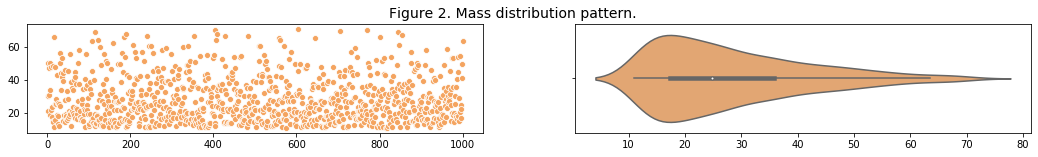

In [69]:
# simulation of the distribution algorithm
velo_distr = np.round(stats.truncnorm.rvs(a, b, loc=mu, scale=sigma, size=1000), 1)

np.random.seed(determinant) # executing this line ensures the generated numbers are the same

print("Minimum:\t", mass_distr.min())
print("Mean:\t\t", mass_distr.mean())
print("Maximum:\t", mass_distr.max())
print("Std diviation:\t", mass_distr.std())

### plotting - 
fig, ax = plt.subplots(ncols=2, figsize=(18, 2))
plt.suptitle("Figure 2. Mass distribution pattern.", y=1.0, fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=None)

# left hand plot - number of entries in each year of observation
sns.scatterplot(x=year, y=velo_distr, color='sandybrown', ax=ax[0])  

# right hand plot - how many the same number of entries occured
sns.violinplot(x=velo_distr, color='sandybrown', ax=ax[1])   

plt.show()

### 6. Size of the largest crater - `Crater`

In my model, I assume that every meteorite hitting the planet's surface creates an impact crater. However, for simplicity, size of only one crater is simulated in a given year,  caused by the impact of the highest energy meteorite. If there was not impact in a given year, there is also no impact crater. This attribute is designated to variable **`Crater`**.

The energy is calculated from the following formula (without specifying the units of measurement):

$$ E = \frac {1} {2} m \times v^{2} $$

where:
$E$ - kinetic energy of the meteorite,
$m$ - mass of the meteorite,
$v$ - velocity of the meteorite.

The calculated value is further randomised by a certain number (noise) that simulate effect of other factors not implicitly considered. The result is always positive by applying the `np.abs()` function.

In the model the impact crater size is directly related to the energy of the meteorite.

#### Calculating the impact crater sizes from the highest energy meteorites

In [17]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.1f}'.format}) # this line eliminates the scientific notation of numbers
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

# effect of random factors - noise
en_noise = np.random.random()

# Calculation of the meteoroids energy
for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0:
        #print(data.loc[i-1]["Mass"], "*", data.loc[i-1]["Velocity"], "=", (data.loc[i-1]["Mass"] * data.loc[i-1]["Velocity"]))
        
        # calculation energy for each meteroid hitting the planet
        energy_calcs = np.round(np.abs(0.5 * data.loc[i-1]["Mass"] * pow(data.loc[i-1]["Velocity"], 2) + en_noise), 2)
        
        # recording only the highest energy metoroid in the dataset
        data.at[i-1, "Crater"] = max(energy_calcs)
                        
    else:
         pass

### 7. Class of the highest energy meteoroid

Even though the relevant science recognises a multi-level meteorites taxonomy (Geology.com, 2019; Meteorite classification - Wikipedia, 2019), I assumed in my model the meteorites can be one of the following three classes only based on their material.

* iron,
* stony,
* stony-iron.

Each class has a certain probability of of occurrence - see below.

In [18]:
# in the solar system occure the following classes of meteorids as well as their corresponding probability of occurance
classes, class_probability = ("iron", "stony", "stony-iron"), (0.86, 0.12, 0.02) # tuple data types, so that the order matters

In [19]:
np.random.seed(determinant) # executing this line ensures the generated numbers are the same

for i in data["Year"]:
    
    if data.loc[i-1]["Impact"] != 0: # on condition there was an impact in this year
        
        # assigning the class in given year
        data.at[i-1, "Class"] = np.random.choice(classes, p=class_probability)
        
    else:
         pass

In [ ]:
sns.pairplot(data, kind="scatter", hue="Class")
plt.show()

___
## Final dataset

The final form of the synthesised dataset is shown below.

In [20]:
data

,Year,Entry,Impact,Mass,Velocity,Crater,Class
0,1,37,12,"[102.0, 14.0, 25.0, 26.0, 82.0, 12.0, 31.0, 10...","[50.2, 21.4, 30.2, 30.8, 47.5, 18.5, 34.1, 50....",128523,stony
1,2,5,0,NaN,NaN,NaN,NaN
2,3,32,4,"[72.0, 11.0, 32.0, 77.0]","[14.9, 48.5, 14.5, 65.9]",167199,iron
3,4,12,2,"[20.0, 12.0]","[11.7, 25.7]",3963.84,iron
4,5,32,4,"[10.0, 16.0, 1.0, 26.0]","[15.8, 48.1, 25.6, 28.2]",18509.8,iron
...,...,...,...,...,...,...,...
995,996,8,0,NaN,NaN,NaN,NaN
996,997,39,6,"[44.0, 22.0, 46.0, 14.0, 395.0, 59.0]","[49.8, 22.7, 51.6, 18.4, 14.3, 27.7]",61239.8,iron
997,998,27,5,"[91.0, 5.0, 9.0, 12.0, 920.0]","[38.8, 12.7, 33.0, 14.0, 12.8]",75367.3,iron
998,999,3,0,NaN,NaN,NaN,NaN


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Year        1000 non-null int64
Entry       1000 non-null int64
Impact      1000 non-null object
Mass        833 non-null object
Velocity    833 non-null object
Crater      833 non-null object
Class       833 non-null object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [87]:
data.describe()

,Year,Entry
count,1000.000000,1000.000000
mean,500.500000,21.320000
std,288.819436,15.839081
min,1.000000,0.000000
25%,250.750000,9.000000
50%,500.500000,18.000000
75%,750.250000,31.000000
max,1000.000000,92.000000


### Dataset visualisation

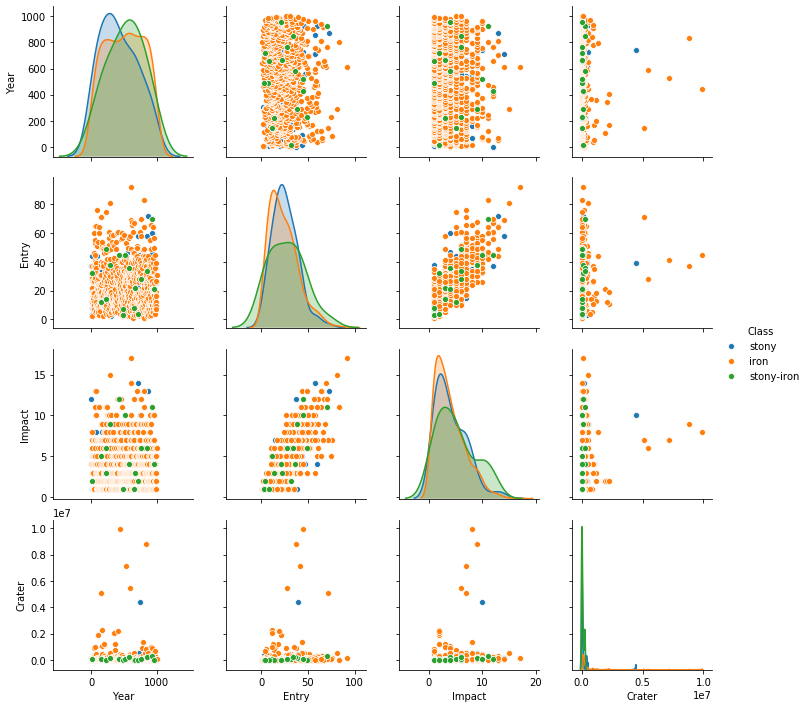

In [83]:
#sns.pairplot(data, kind="scatter")
sns.pairplot(data, hue="Class")
plt.show()

___
## References and bibliography 

### Project description

- McGinley, B., Programming for Data Analysis - Project Brief 2019. [pdf] GMIT. Available at: <https://github.com/brianmcgmit/ProgDA/raw/master/ProgDA_Project.pdf> [Accessed November 2019].
- Programming for Data Analysis - module webpage. [online] Learnonline.gmit.ie. Available at: <https://learnonline.gmit.ie/course/view.php?id=1127> [Accessed December 2019].

### Phenomenon

- Atmospheric entry - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Atmospheric_entry> [Accessed November 2019].
- Center for Near Earth Objects Studies, NASA. [online] Available at: <https://cneos.jpl.nasa.gov/> [Accessed November 2019].
- Collins, G.S., Melosh, H.J. and Marcus, R.A. (2005), Earth Impact Effects Program: A Web‐based computer program for calculating the regional environmental consequences of a meteoroid impact on Earth. Meteoritics & Planetary Science, 40: 817-840. Available at: <https://doi.org/10.1111/j.1945-5100.2005.tb00157.x [Accessed November 2019]>.
- Earth Impact Database - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Earth_Impact_Database> [Accessed November 2019].
- Earth Impact Effects Program. [online] Available at: <https://impact.ese.ic.ac.uk/ImpactEarth/ImpactEffects/> [Accessed November 2019].
- Geology.com. Types of Meteorites: Iron, Stone, Stony-Iron, Lunar, Martian. [online] Available at: <https://geology.com/meteorites/meteorite-types-and-classification.shtml> [Accessed December 2019].
- Gribbin, J. (2005). Deep simplicity. New York: Random House.
- Impact event - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Impact_event> [Accessed November 2019].
- Lpi.usra.edu. Impacting Meteorites and Their Craters. [online] Available at: <https://www.lpi.usra.edu/science/kring/epo_web/meteorites/craters/> [Accessed November 2019].
- Mann, A., What Are Meteorites?. [online] Space.com. Available at: <https://www.space.com/42636-meteorites.html> [Accessed November 2019].
- Meteorite - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Meteorite> [Accessed November 2019].
- Meteorite classification - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Meteorite_classification#Stony_meteorites> [Accessed November 2019].
- Meteorite fall statistics - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Meteorite_fall_statistics> [Accessed December 2019].
- Mohammed, A. et al. How the Size of a Meteorite and Asteroid on the Moon and Planets is Related to the Size of the Crater, International Journal of Astronomy, Vol. 5 No. 2, 2016, pp. 13-18. doi: 10.5923/j.astronomy.20160502.01, Available at: <http://article.sapub.org/10.5923.j.astronomy.20160502.01.html> [Accessed December 2019
- Mohammed, A., Abdulla, H. and Ahmad, A., How the Size of a Meteorite and Asteroid on the Moon and Planets is Related to the Size of the Crater. [online] Available at: <http://article.sapub.org/10.5923.j.astronomy.20160502.01.html> [Accessed December 2019].
- NASA Solar System Exploration - Meteors & Meteorites. [online] Available at: <https://solarsystem.nasa.gov/asteroids-comets-and-meteors/meteors-and-meteorites/overview/> [Accessed December 2019].
- Planetary science - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Planetary_science> [Accessed December 2019].
- Planetary Science Institute - Meteoroids/Meteorites FAQ. [online] Available at: <https://www.psi.edu/epo/faq/meteor.html> [Accessed December 2019].
- Tulane.edu. Meteorites, Impacts, & Mass Extinction. [online] Available at: <https://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm> [Accessed December 2019].

### Data synthesis

- Albon, C., Generating Random Numbers With NumPy. [online] Available at: <https://chrisalbon.com/python/basics/generating_random_numbers_with_numpy/> [Accessed December 2019].
- Brownlee, J., How to Generate Test Datasets in Python with scikit-learn. [online] Machine Learning Mastery. Available at: <https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/> [Accessed December 2019].
- Stack Overflow. Stack Overflow - Where Developers Learn, Share, & Build Careers. [online] Available at: <https://stackoverflow.com/> [Accessed December 2019].

### Numerical tools

- SciPy - Reference Guide. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/> [Accessed December 2019].
- NumPy - Documentation. [online] Available at: <https://numpy.org/doc/> [Accessed December 2019].
- Pandas - Documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/> [Accessed November 2019].
- Random sampling (numpy.random) - NumPy v1.16 Manual. [online] Available at: <https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html> [Accessed November 2019].
- A truncated normal continuous random variable (scipy.stats.truncnorm) - SciPy v1.3.3 Reference Guide. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html> [Accessed December 2019].

___
It is worth noting that there are also other kinds of craters which phenomenon is not fully understood.
![Localised impact craters field?](https://d1ix0byejyn2u7.cloudfront.net/drive/images/uploads/headers/ws_cropper/1_0x0_1410x520_0x520_potholes.jpg)
Image source: [RAC](https://www.rac.co.uk/drive/advice/road-safety/report-a-pothole/)

___
Andrzej Kocielski